## Creacion y solucion del sistema  formado por:

$-wG_{n,\xi\sigma}=\delta_{n,\sigma}+E_0G_{n,\xi\sigma}+\gamma\left(
e^{i\theta}G_{n+(N+1),\xi\sigma}+e^{-i\theta}G_{n+(N-1),\xi\sigma}\right) + \frac{i\lambda_{EO}}{2}\nu\xi G_{n+(N+2),\xi\sigma} + \frac{i\lambda_R}{2}e^{i\xi\sigma\phi}\left(G_{n+(N-1),-\xi\sigma}-G_{n+(N+1),-\xi\sigma}
\right)$

con el argumento de periodicidad:  $G_{N+n,\xi\sigma}=G_{n,\xi\sigma}$


Veamos cada los valores que acompanan a cada termino por separado:

$(t_0) \rightarrow G_{n,\xi\sigma}$

$(t_1) \rightarrow G_{n+(N+1),\xi\sigma}$ 

$(t_2) \rightarrow G_{n+(N-1),\xi\sigma}$ 

$(t_3) \rightarrow G_{n+(N+2),\xi\sigma}$ 

$(t_4) \rightarrow G_{n+(N-1),-\xi\sigma}$ 

$(t_5) \rightarrow G_{n+(N+1),-\xi\sigma}$

El punto es crear un sistema algebraico del tipo $AG=B$ y resolver para $G$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [12]:
N = 10 # numero de sitios
gamma = 1
theta = 1
psi = 1
nu = 1
l_R = 1
l_EO = 1
sigma = 1
E0 = 1
KbT = 1
e = 1.6E-19

In [13]:
def fila(n,xi,w,theta,psi):
    '''
    Esta función crea cada fila (cada ecuación)
    n indica el sitio en cuestión
    '''
    A = np.zeros(2*N,dtype=complex)
    # evaluemos cada termino
    if xi==1: i = 0
    else: i = N
    A[n-1+i] += (E0+w) # t0
    k = n+1
    if k>N: k=k-N 
    A[k-1+i] += gamma*np.exp(theta*1j) # t1
    k = (n-1)
    A[k-1+i] += gamma*np.exp(-theta*1j) # t2 
    k = n+2
    if k>N: k=k-N
    A[k-1+i] += l_EO*nu*xi*0.5j # t3
    if xi==1: i = N
    else: i = 0
    k = n-1
    A[k-1+i] += l_R*np.exp(xi*sigma*psi*1j)*0.5j  # t4
    k = n+1
    if k>N: k=k-N
    A[k-1+i] += -l_R*np.exp(xi*sigma*psi*1j)*0.5j # t5    
    return A

def matrix_A(w,theta,psi):
    '''
    Esta función crea la matriz completa con los valores de xi=1 
    y luego con los valores de xi=-1, en ese orden
    '''
    A = np.matrix(np.empty(shape=(0,2*N), dtype=complex))
    for n in range(1,N+1):  
        a1 = fila(n,1,w,theta,psi)
        A = np.insert(A,(n-1),a1,axis=0)
    for n in range(1,N+1):  
        a1 = fila(n,-1,w,theta,psi)
        A = np.insert(A,(n-1)+N,a1,axis=0)
    return A


w=1.5
A = matrix_A(w,theta,psi)

    

In [14]:
B = np.zeros(2*N,dtype=complex)
B[0] = -1

In [15]:
G = np.dot(np.linalg.inv(A),B)
G = np.asarray(G).ravel()

# Los valores de G[0]=g_1,1  G[1] = g_2,1, ... G[N/2] = g_1,-1 ... G[-1] = g_N,-1
print(G)
#print(np.dot(A,G)) #chequeo de q lo resuelve correctamente!!

[-0.357235  -0.0254792j   0.11211167-0.0946935j  -0.03336686+0.03783646j
  0.0708541 -0.05510834j -0.00326927+0.14410284j -0.13842786-0.0815039j
  0.10064682-0.06842845j  0.01829985+0.02995027j  0.0455383 +0.02337974j
  0.0308439 +0.13446247j  0.05487046+0.03462876j -0.08039976+0.07477548j
  0.06581669-0.14348428j  0.04640448+0.21014585j -0.20714809-0.12063249j
  0.20025772-0.07293053j -0.06067425+0.13095189j  0.01569831-0.08620311j
 -0.00626967+0.11933408j -0.11647426-0.12168014j]


# calculo de la densidad de Corriente J

$J_c = ie\left[\gamma\left(e^{i\theta}g^{<}_{2\sigma,1\sigma} - e^{-i\theta}g^{<}_{N(\sigma),1\sigma}\right) 
+i\lambda_{EO}\nu_n\sigma g^{<}_{3\sigma,1\sigma} - \frac{i\lambda_R}{2}
e^{-i\sigma\phi}\left(g^{<}_{2(-\sigma),1\sigma}+g^{<}_{N(-\sigma),1\sigma}\right)\right]$

con 

$g^{<}(w)=\frac{-2iIm(g^r)}{e^{\beta w}+1}$

En este caso tomare como $g^r$ los obtenidos numericamente de la resolucion del sistema AG=b


In [16]:
def den_corr(G,w,theta,psi):
    '''
    Calculo de la densidad de corriente
    '''
    a1 = -2j*G[1].imag/(np.exp(1/KbT)+1)
    a2 = -2j*G[N-1].imag/(np.exp(1/KbT)+1)
    a3 = -2j*G[N+1].imag/(np.exp(1/KbT)+1)
    a4 = -2j*G[-1].imag/(np.exp(1/KbT)+1)
    b  = -2j*G[2].imag/(np.exp(1/KbT)+1)
    t1 = gamma*(np.exp(theta*1j)*a1-np.exp(-theta*1j)*a2)
    t2 = l_R*0.5j*np.exp(-sigma*psi*1j)*(a3+a4)
    Jc = 1j*e*(t1 + 1j*l_EO*nu*sigma*b - t2)
    return Jc

In [17]:
Jc = den_corr(G,w,theta,psi)
Jc

(-8.957172348060288e-21+7.226756905136055e-21j)

- - - 
## Grafiquemos Jc vs $\phi$

In [18]:
l_R = 0.12
l_EO = 0.07

def corrida_phi(phi_0,phi_f,n_phi):
    p = np.linspace(phi_0,phi_f,n_phi)
    Jc = np.array([],dtype=complex)
    for phi in p:
        A = matrix_A(w,theta,phi)       # creamos la matriz A
        B = np.zeros(2*N,dtype=complex) # creamos el vector B
        B[0] = -1
        G = np.dot(np.linalg.inv(A),B)  # Resolvemos el sistema AG=B
        G = np.asarray(G).ravel()
        Jc = np.append(Jc,den_corr(G,w,theta,phi)) # calculamos Jc
    return p, Jc


Text(0, 0.5, 'Real(Jc)')

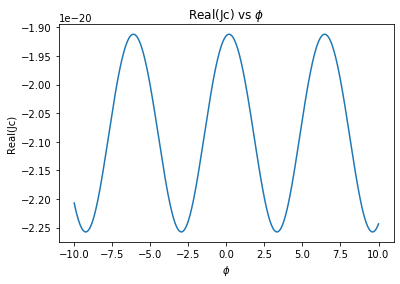

In [19]:
p,Jc = corrida_phi(-10,10,1000)

plt.plot(p,Jc.real) # grafico la parte real de Jc
plt.title("Real(Jc) vs $\\phi$")
plt.xlabel("$\\phi$")
plt.ylabel("Real(Jc)")

Text(0, 0.5, 'Real(Jc)')

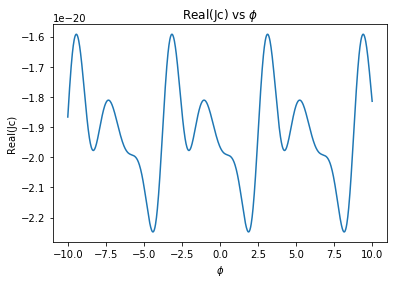

In [20]:
# cambiemos los valores de l_R y l_EO

l_R = 0.7
l_EO = 0.7

p,Jc = corrida_phi(-10,10,1000)

plt.plot(p,Jc.real) # grafico la parte real de Jc
#plt.plot(p,Jc.imag)
plt.title("Real(Jc) vs $\\phi$")
plt.xlabel("$\\phi$")
plt.ylabel("Real(Jc)")